# Sampling on graphs

## Dependencies

In [2]:
%load_ext autoreload
%autoreload 2

from netin import DPAH
from netin import sampling
from netin import viz
from netin import stats

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Parameters

In [3]:
### Network
n = 500
f_m = 0.1
d = 0.005
h_MM = 0.9
h_mm = 0.9
plo_M = 2.0
plo_m = 2.0
seed = 6789

In [4]:
### Sample size (fraction of nodes in sample)
sample_size = 0.2

## Network generation

In [5]:
# DPA: Preferential attachment only
g = DPAH(n=n, f_m=f_m, d=d, plo_M=plo_M, plo_m=plo_m, h_MM=h_MM, h_mm=h_mm, seed=seed)
g.generate()

## Sampling

### Random nodes

In [6]:
### Sampling by random nodes
gs_nodes = sampling.RandomNodes(g=g, pseeds=sample_size, max_tries=1, random_seed=seed)
gs_nodes.sampling()
gs_nodes.sample.number_of_nodes(), gs_nodes.sample.number_of_edges()

(100, 135)

### Random edges

In [7]:
### Sampling by random edges
gs_edges = sampling.RandomEdges(g=g, pseeds=sample_size, max_tries=1, random_seed=seed)
gs_edges.sampling()
gs_edges.sample.number_of_nodes(), gs_edges.sample.number_of_edges()

(101, 87)

### Degree rank (desc)

In [8]:
### Sampling by degree rank desc
gs_degree_desc = sampling.DegreeRank(g=g, pseeds=sample_size, random_seed=seed, order='desc')
gs_degree_desc.sampling()
gs_degree_desc.sample.number_of_nodes(), gs_degree_desc.sample.number_of_edges()

(100, 662)

### Degree rank (asc)

In [9]:
### Sampling by degree rank asc
gs_degree_asc = sampling.DegreeRank(g=g, pseeds=0.4, random_seed=seed, order='asc')
gs_degree_asc.sampling()
gs_degree_asc.sample.number_of_nodes(), gs_degree_asc.sample.number_of_edges()

(200, 3)

### Degree group rank (desc)

In [10]:
### Sampling by degree group rank desc
gs_degree_group_desc = sampling.DegreeGroupRank(g=g, pseeds=sample_size, random_seed=seed, order='desc')
gs_degree_group_desc.sampling()
gs_degree_group_desc.sample.number_of_nodes(), gs_degree_group_desc.sample.number_of_edges()

(100, 531)

### Degree group rank (asc)

In [11]:
### Sampling by degree group rank asc
gs_degree_group_asc = sampling.DegreeGroupRank(g=g, pseeds=sample_size, random_seed=seed, order='asc')
gs_degree_group_asc.sampling()
gs_degree_group_asc.sample.number_of_nodes(), gs_degree_group_asc.sample.number_of_edges()

(100, 96)

### Random neighbor

In [12]:
### Sampling by random neighbor
gs_neighbor = sampling.RandomNeighbor(g=g, pseeds=sample_size, random_seed=seed)
gs_neighbor.sampling()
gs_neighbor.sample.number_of_nodes(), gs_neighbor.sample.number_of_edges()

(100, 69)

### Partial crawls

In [13]:
### Sampling by partial crawls
gs_pcrawls = sampling.PartialCrawls(g=g, pseeds=sample_size, random_seed=seed, snsize=0.01)
gs_pcrawls.sampling()
gs_pcrawls.sample.number_of_nodes(), gs_pcrawls.sample.number_of_edges()

(100, 117)

## Plots

In [14]:
viz.reset_style()
viz.set_paper_style()

### Graph

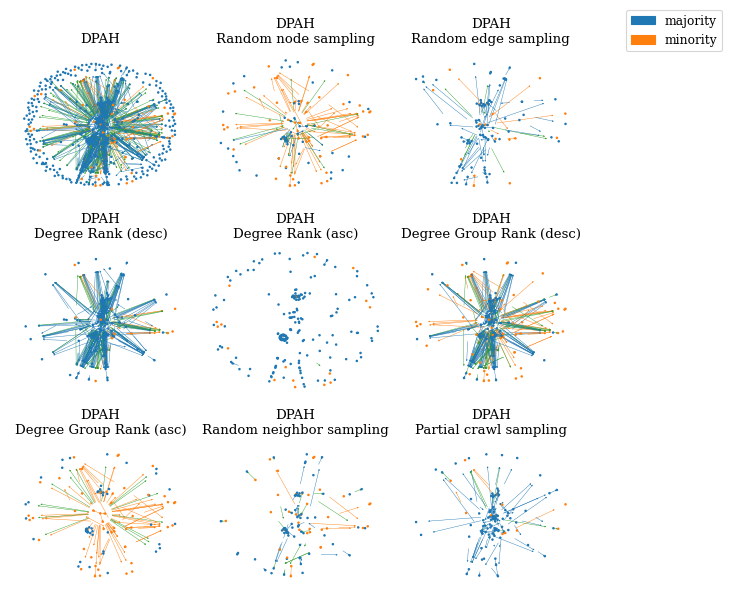

In [15]:
graphs = [g, 
          gs_nodes.sample, gs_edges.sample, 
          gs_degree_desc.sample, gs_degree_asc.sample, 
          gs_degree_group_desc.sample, gs_degree_group_asc.sample,
          gs_neighbor.sample, gs_pcrawls.sample]

viz.plot_graph(graphs, cell_size=2, 
               nc=3,
               share_pos=True, edge_width=0.3)